In [1]:
import pandas as pd
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
# change csv
df = pd.read_csv("train.csv", usecols =[1,2,4,5,6,7,9,11])
print(df)

     Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0           0       3    male  22.0      1      0   7.2500        S
1           1       1  female  38.0      1      0  71.2833        C
2           1       3  female  26.0      0      0   7.9250        S
3           1       1  female  35.0      1      0  53.1000        S
4           0       3    male  35.0      0      0   8.0500        S
..        ...     ...     ...   ...    ...    ...      ...      ...
886         0       2    male  27.0      0      0  13.0000        S
887         1       1  female  19.0      0      0  30.0000        S
888         0       3  female   NaN      1      2  23.4500        S
889         1       1    male  26.0      0      0  30.0000        C
890         0       3    male  32.0      0      0   7.7500        Q

[891 rows x 8 columns]


In [3]:
df = df.rename(columns={
    'Pclass':'Class',
    'SibSp':'Ss',
    'Parch':'Pc',    
})

In [4]:
df.count()

Survived    891
Class       891
Sex         891
Age         714
Ss          891
Pc          891
Fare        891
Embarked    889
dtype: int64

In [5]:
df = df.dropna()
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])
df['Embarked'] = LabelEncoder().fit_transform(df['Embarked'])

In [6]:
y = df['Survived']
x = df.drop(['Survived'], axis=1)

In [7]:
x.head()

,Class,Sex,Age,Ss,Pc,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2


In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=0)

clf = tree.DecisionTreeClassifier(criterion="entropy", max_depth=5)
clf = clf.fit(x_train, y_train)

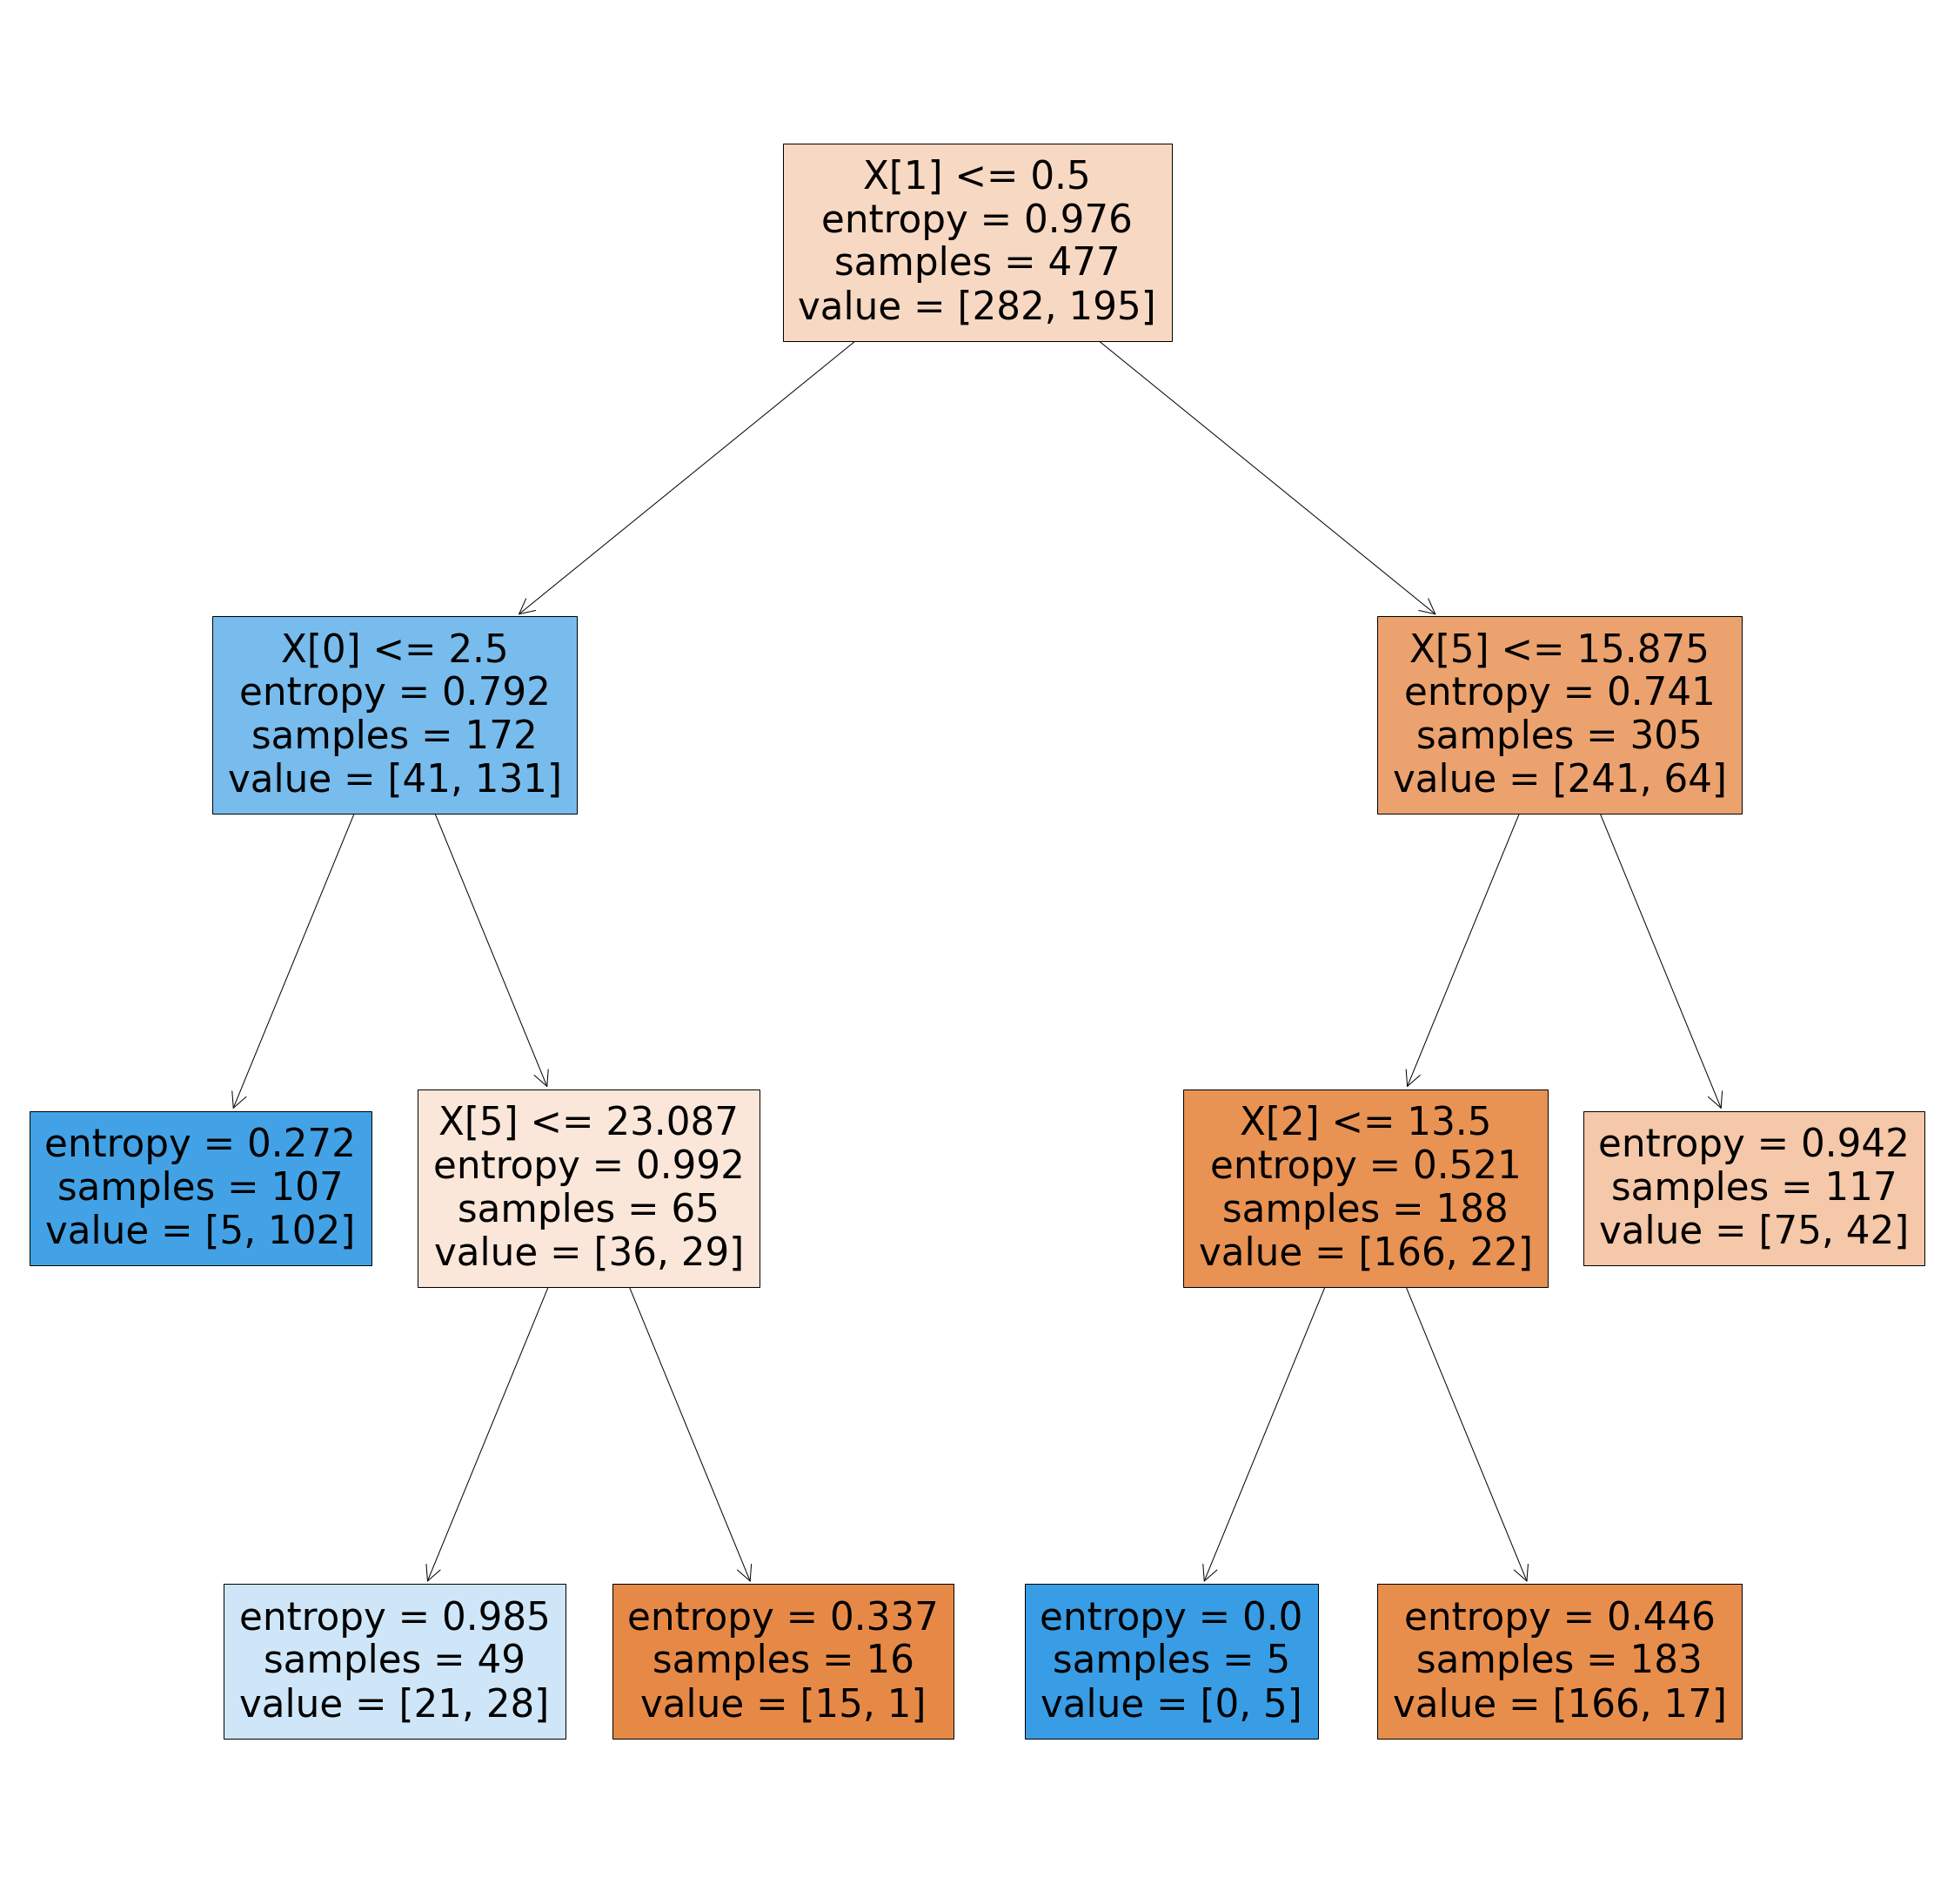

<Figure size 432x288 with 0 Axes>

In [9]:
fig, ax = plt.subplots(figsize=(40, 40))  # whatever size you want

import matplotlib.pyplot as plt
plt.figure()
tree.plot_tree(clf,filled=True, ax=ax)  
plt.savefig('tree.png',format='png',bbox_inches = "tight")

In [10]:
path = clf.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

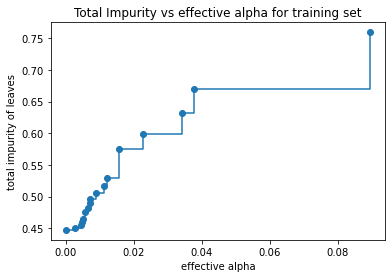

In [11]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [12]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(criterion="entropy", random_state=0, ccp_alpha=ccp_alpha, max_depth=5)
    clf.fit(x_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.21625423621190076


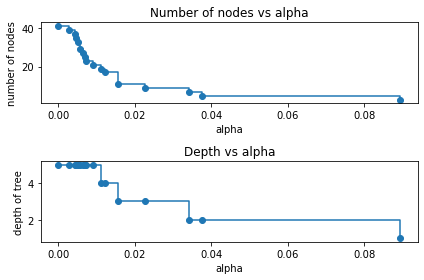

In [13]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

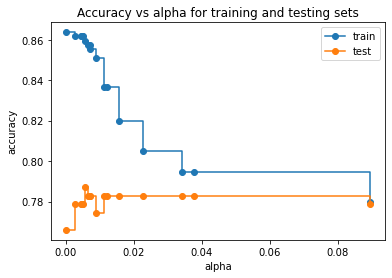

In [14]:
train_scores = [clf.score(x_train, y_train) for clf in clfs]
test_scores = [clf.score(x_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [15]:
# now we know which alpha is the best, we use it for to train the final model 

In [16]:
target = df['Survived']
df = df.drop(columns=['Survived'])

In [17]:
f_clf = tree.DecisionTreeClassifier(criterion="entropy", max_depth=5, ccp_alpha=0.015)
f_clf = f_clf.fit(df, target)

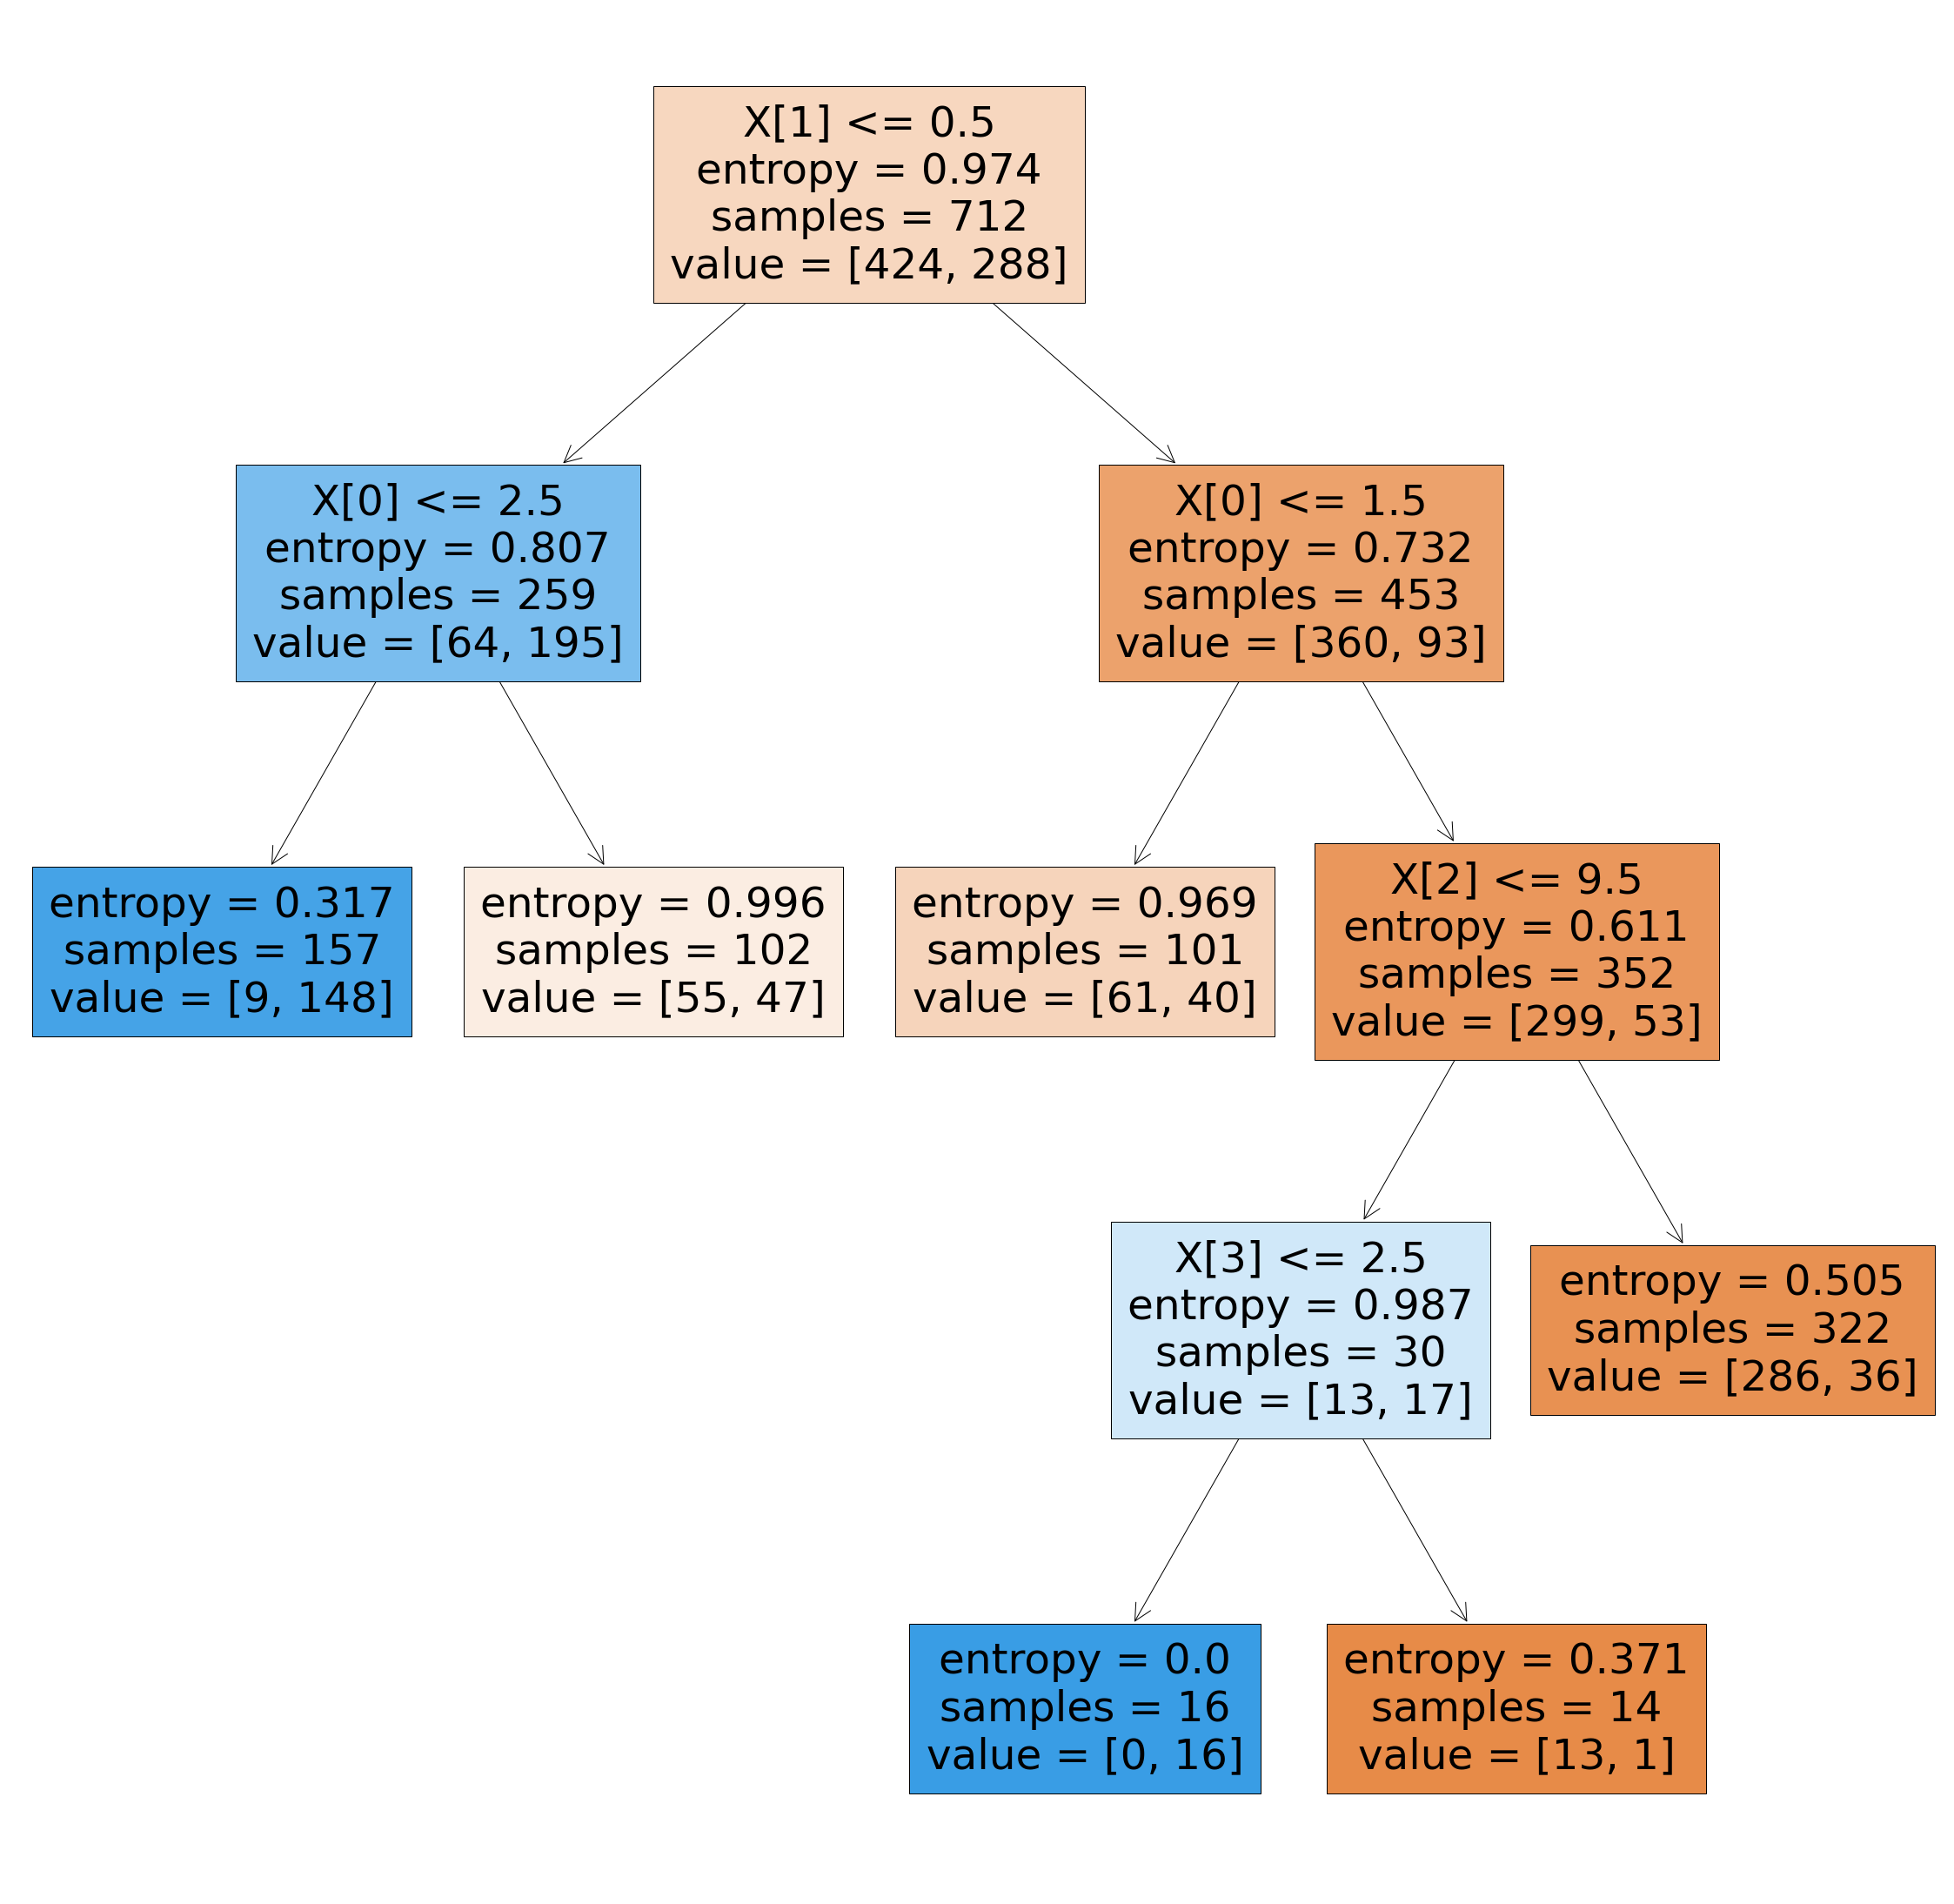

<Figure size 432x288 with 0 Axes>

In [18]:
fig, ax = plt.subplots(figsize=(40, 40))  # whatever size you want

import matplotlib.pyplot as plt
plt.figure()
tree.plot_tree(f_clf,filled=True, ax=ax)  
plt.savefig('tree.png',format='png',bbox_inches = "tight")

In [19]:
# now fit the test data into it after modifying it 

In [20]:
df2 = pd.read_csv('test.csv', usecols=[1,3,4,5,6,8,10])

In [21]:
df2 = df2.rename(columns={
    'Pclass':'Class',
    'SibSp':'Ss',
    'Parch':'Pc',    
})

In [22]:
df2['Sex'] = LabelEncoder().fit_transform(df2['Sex'])
df2['Embarked'] = LabelEncoder().fit_transform(df2['Embarked'])

In [23]:
df2

,Class,Sex,Age,Ss,Pc,Fare,Embarked
0,3,1,34.5,0,0,7.8292,1
1,3,0,47.0,1,0,7.0000,2
2,2,1,62.0,0,0,9.6875,1
3,3,1,27.0,0,0,8.6625,2
4,3,0,22.0,1,1,12.2875,2
...,...,...,...,...,...,...,...
413,3,1,NaN,0,0,8.0500,2
414,1,0,39.0,0,0,108.9000,0
415,3,1,38.5,0,0,7.2500,2
416,3,1,NaN,0,0,8.0500,2


In [24]:
df2.loc[df2['Age'].isnull(), 'Age'] = df2['Age'].mean()
df2.loc[df2['Fare'].isnull(), 'Fare'] = df2['Fare'].mean()

In [25]:
df2

,Class,Sex,Age,Ss,Pc,Fare,Embarked
0,3,1,34.50000,0,0,7.8292,1
1,3,0,47.00000,1,0,7.0000,2
2,2,1,62.00000,0,0,9.6875,1
3,3,1,27.00000,0,0,8.6625,2
4,3,0,22.00000,1,1,12.2875,2
...,...,...,...,...,...,...,...
413,3,1,30.27259,0,0,8.0500,2
414,1,0,39.00000,0,0,108.9000,0
415,3,1,38.50000,0,0,7.2500,2
416,3,1,30.27259,0,0,8.0500,2


In [26]:
df2.count()

Class       418
Sex         418
Age         418
Ss          418
Pc          418
Fare        418
Embarked    418
dtype: int64

In [27]:
f_clf.predict(df2)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [28]:
df3 = pd.read_csv('gender_submission.csv')
df3['Survived'] = f_clf.predict(df2)

In [29]:
df3

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [30]:
df3.to_csv('finalprediction.csv', index=False)